

```
NLP Assignment 3 (Sentiment Analysis)
Name : Krishna Kant Verma
Roll No : 2211cs19
Name : Gourob Chatterjee
Roll No : 2211cs08
```



$$
Importing \space All \space Required \space Libraries
$$

In [3]:
import spacy
import re
import sys
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import LSTM,Dense,Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow import keras
from progressbar import progressbar
import pandas as pd
import numpy as np

# Zip File Extraction



```
# Extracting the Positive Zip Folder and Negative Zip Folder to POS/NEG SubFolder 
```



In [6]:
import shutil
pos_zip = "/content/pos.zip"
neg_zip = "/content/neg.zip"
shutil.unpack_archive(pos_zip, "/content/POS", "zip")
shutil.unpack_archive(neg_zip, "/content/NEG", "zip")



```
Import OS Libarary and Read File
```



In [7]:
import os
def read_file(file_location):
    with open(file_location, 'r', encoding='utf-8') as f:
        return f.readlines()



```
Reading Text Data and Processing it Make it Operable
```



In [8]:
def read_text(folder_locations, max_files_toread):
    textData = []
    textFileLocations = []
    if not isinstance(folder_locations, str):
        for location in folder_locations:
            textFileLocations.append([os.path.join(location, file_name) for file_name in os.listdir(location)][:max_files_toread])
    else:
        print("Folder locations should be in list or tuple format.\nExample: [Folder loc1, Folder loc2, Folder loc3]")
        return

    classNames = [0 for _ in folder_locations]
    currLen = 0

    for location_ind, text_file_location in enumerate(textFileLocations):
        for text_file in text_file_location:
            try:
                textData.append(read_file(text_file))
            except Exception as e:
                print(e, text_file)
        classNames[location_ind] = len(textData) - currLen
        currLen = len(textData)

    classLabels = []
    for index, no_of_files_inclass in enumerate(classNames):
        classLabels += [index for number in range(no_of_files_inclass)]
    return textData, classLabels

textData, classLabels = read_text(["/content/NEG/neg", "/content/POS/pos"], 5000)



```
Printing textData 1 output (with labels)
```



In [9]:
textData[1],classLabels[1]

(["Who did the research for this film? It's set in Baghdad in 2004, however all the Soldiers are wearing ACUs and have all Universal Camouflage Pattern gear. No one was wearing that stuff in 04. <br /><br />I just saw this film while deployed overseas and I can say that the overwhelming feeling from the audience was WTF? This movie made no sense, had characters come and go with no explanation, and people doing ridiculous things that would NEVER happen in real life. I realize that it's a movie, but it's obviously trying to portray something realistic. It fails miserably, but it's trying. <br /><br />It's like someone came up with a bunch of random ideas, chewed them up and swallowed, then vomited out a film. I would not recommend this film to anyone. I'm still not sure why I sat through the whole thing. GI Joe was one that really made you think compared to this. STAY AWAY!"],
 0)

In [10]:
textData[0]

["From the creators of Shrek\x85\x85\x85\x85.. OK, that grabbed my attention.<br /><br />Well the creators of Shrek also made Madagascar. Madagascar was half as good as Shrek.<br /><br />And now Flushed Away is half as good as Madagascar.<br /><br />That means Flushed Away isn't good. The animation and all that special effects were extremely good but the movie wasn't.<br /><br />The story of this movie was only meant for kids. It's seriously not possible for adults to actually love this flick.<br /><br />But there were many jokes meant for adults. I bet kids dint understand the jokes.<br /><br />Despite that I dint like this flick.<br /><br />I am completely disappointed. 4/10"]



```
Eliminating all unnecessary HTML and other hyper Texts
```



In [11]:
regex = re.compile(r'<[^>]+>')
def removeHyperTags(string):
    return regex.sub(' ', string) 



```
calling removeHyperText Function
```



In [12]:
textData = [removeHyperTags(text[0]) for text in textData]



```
Text After Processing all the removal of hypertexts
```



In [13]:
textData[0]

"From the creators of Shrek\x85\x85\x85\x85.. OK, that grabbed my attention.  Well the creators of Shrek also made Madagascar. Madagascar was half as good as Shrek.  And now Flushed Away is half as good as Madagascar.  That means Flushed Away isn't good. The animation and all that special effects were extremely good but the movie wasn't.  The story of this movie was only meant for kids. It's seriously not possible for adults to actually love this flick.  But there were many jokes meant for adults. I bet kids dint understand the jokes.  Despite that I dint like this flick.  I am completely disappointed. 4/10"

#Tokenizing Texts



```
Function to Tokenize text
```



In [14]:
def tokenize(texts):
    for text_ind,text in enumerate(texts):
        texts[text_ind]=text.lower()     
    nlp = spacy.load('en_core_web_sm') 
    tokenizedTexts = []
    for ind,text in enumerate(texts):
        print(ind,len(texts))
        doc = nlp(text) 
        tokens = [token.text for token in doc]  
        tokenizedTexts.append(tokens)   
    return tokenizedTexts



```
Calling Tokenize Text Function over First Dataset
```



In [15]:
tokenizedTexts = tokenize(textData)

Streaming output truncated to the last 5000 lines.
5000 10000
5001 10000
5002 10000
5003 10000
5004 10000
5005 10000
5006 10000
5007 10000
5008 10000
5009 10000
5010 10000
5011 10000
5012 10000
5013 10000
5014 10000
5015 10000
5016 10000
5017 10000
5018 10000
5019 10000
5020 10000
5021 10000
5022 10000
5023 10000
5024 10000
5025 10000
5026 10000
5027 10000
5028 10000
5029 10000
5030 10000
5031 10000
5032 10000
5033 10000
5034 10000
5035 10000
5036 10000
5037 10000
5038 10000
5039 10000
5040 10000
5041 10000
5042 10000
5043 10000
5044 10000
5045 10000
5046 10000
5047 10000
5048 10000
5049 10000
5050 10000
5051 10000
5052 10000
5053 10000
5054 10000
5055 10000
5056 10000
5057 10000
5058 10000
5059 10000
5060 10000
5061 10000
5062 10000
5063 10000
5064 10000
5065 10000
5066 10000
5067 10000
5068 10000
5069 10000
5070 10000
5071 10000
5072 10000
5073 10000
5074 10000
5075 10000
5076 10000
5077 10000
5078 10000
5079 10000
5080 10000
5081 10000
5082 10000
5083 10000
5084 10000
5085 10000
508

# Finding Out Most Frequent Tokens In DataSet



```
Function to find Out most frequent tokens
```



In [16]:
def maxFrequentTokens( textData, frequency=5 ):
    counter={}
    for text in textData:
        for token in text:
            if token in counter:
                counter[token]+=1
            else:
                counter[token]=1
    FrequentTokens=[]
    for i in counter.items():   
      if i[1]>frequency:
        FrequentTokens.append(i[0])
    return FrequentTokens

FrequentTokens = maxFrequentTokens(tokenizedTexts,frequency=300)

f" Most frequent Tokens length  {len(FrequentTokens)}"

' Most frequent Tokens length  814'

In [17]:
tokenizedTexts[1][:10]

['who', 'did', 'the', 'research', 'for', 'this', 'film', '?', 'it', "'s"]

# Finding Out Padding Sequences

In [18]:
def padSeq(sequences):
    averageLen=0
    for text in sequences:
        averageLen+=len(text)
    averageLen=int(averageLen/len(tokenizedTexts))
    for text_ind,text in enumerate(sequences):
        if len(text)>=averageLen:
            sequences[text_ind]=text[:averageLen]
        else:
            for i in range(averageLen-len(text)):         
              sequences[text_ind].append('PAD')         


In [19]:
padSeq(tokenizedTexts)

#Encoding Words to One-Hot-Encoding

In [20]:
def oneHotEncoding(tokenizedTexts):  
    token_to_number={x:to_categorical(ind,num_classes=len(FrequentTokens)+1,dtype='uint8') for ind,x in enumerate(FrequentTokens)}
    token_to_number['unk']=np.array([0 for x in range(len(FrequentTokens))]+[1])
    for text in tokenizedTexts:
      for token_ind,token in enumerate(text):
        if token in token_to_number:
          text[token_ind]=token_to_number[token]
        else:
          text[token_ind]=token_to_number['unk']   
oneHotEncoding(tokenizedTexts)

In [21]:
X_array = np.array(tokenizedTexts,dtype='uint8')

In [22]:
dataSet_1 = X_array

# Second Dataset (SemEval Tweet Dataset)

In [23]:
data_2 = pd.read_csv("/content/2013semeval_train.csv")

In [24]:
data_2.tweet

0       Gas by my house hit $3.39!!!! I\u2019m going t...
1       Theo Walcott is still shit\u002c watch Rafa an...
2       its not that I\u2019m a GSP fan\u002c i just h...
3       Iranian general says Israel\u2019s Iron Dome c...
4       Tehran\u002c Mon Amour: Obama Tried to Establi...
                              ...                        
9679    RT @MNFootNg It's monday and Monday Night Foot...
9680    All I know is the road for that Lomardi start ...
9681    "All Blue and White fam, we r meeting at Golde...
9682    @DariusButler28   Have a great game agaist Tam...
9683    "I'm pisseeedddd that I missed Kid Cudi's show...
Name: tweet, Length: 9684, dtype: object

#unicode Cleaning

In [25]:
uniEscRegx = re.compile(r'\\u([0-9a-fA-F]{4})')
def convert_escape_sequence(match):
    return chr(int(match.group(1), 16))

In [26]:
result = uniEscRegx.sub(convert_escape_sequence, data_2.tweet[1])
def changeString(string):
    return uniEscRegx.sub(convert_escape_sequence,string)

In [27]:
print(result)

Theo Walcott is still shit, watch Rafa and Johnny deal with him on Saturday.


In [28]:
data_2.tweet = data_2.tweet.apply(changeString)

#Tokenizing Second Tweet DataSet

In [29]:
tokenizedTexts = tokenize( data_2.tweet )

Streaming output truncated to the last 5000 lines.
4684 9684
4685 9684
4686 9684
4687 9684
4688 9684
4689 9684
4690 9684
4691 9684
4692 9684
4693 9684
4694 9684
4695 9684
4696 9684
4697 9684
4698 9684
4699 9684
4700 9684
4701 9684
4702 9684
4703 9684
4704 9684
4705 9684
4706 9684
4707 9684
4708 9684
4709 9684
4710 9684
4711 9684
4712 9684
4713 9684
4714 9684
4715 9684
4716 9684
4717 9684
4718 9684
4719 9684
4720 9684
4721 9684
4722 9684
4723 9684
4724 9684
4725 9684
4726 9684
4727 9684
4728 9684
4729 9684
4730 9684
4731 9684
4732 9684
4733 9684
4734 9684
4735 9684
4736 9684
4737 9684
4738 9684
4739 9684
4740 9684
4741 9684
4742 9684
4743 9684
4744 9684
4745 9684
4746 9684
4747 9684
4748 9684
4749 9684
4750 9684
4751 9684
4752 9684
4753 9684
4754 9684
4755 9684
4756 9684
4757 9684
4758 9684
4759 9684
4760 9684
4761 9684
4762 9684
4763 9684
4764 9684
4765 9684
4766 9684
4767 9684
4768 9684
4769 9684
4770 9684
4771 9684
4772 9684
4773 9684
4774 9684
4775 9684
4776 9684
4777 9684
4778 9684

#Finding Out Most Freuent Tokens

In [30]:
FrequentTokens = maxFrequentTokens(tokenizedTexts,frequency=200)
f" Most frequent Tokens length  {len(FrequentTokens)}"

' Most frequent Tokens length  138'

#Conversion to One Hot Encoding after Padding Sequences

In [31]:
padSeq(tokenizedTexts)      
oneHotEncoding(tokenizedTexts)

In [32]:
X_array = np.array(tokenizedTexts,dtype='uint8')

In [33]:
dataSet_2 = X_array

In [34]:
dataSet_1.shape,dataSet_2.shape

((10000, 273, 815), (9684, 23, 139))

\

```
# converting first dataset labels to numpy array
```

In [35]:
dataSet_1_labels=np.array(classLabels)



```
# converting second dataset labels to numpy array
```

In [36]:
uniqLabels={x:ind for ind,x in enumerate(data_2.label.unique())}

In [37]:
data_2.label = data_2.label.apply(lambda x:uniqLabels[x])

In [38]:
dataSet_2_labels = data_2.label.values

#Finalizing Our DataSet (Shaping Our Dataset)

In [39]:
dataSet_1.shape
dataSet_1_labels.shape
dataSet_2.shape
dataSet_2_labels.shape

(9684,)

# Creating Model Using RNN



```
Creating Model For First Dataset
```



In [40]:
model_1_RNN=keras.Sequential([
    LSTM(256,input_shape=dataSet_1.shape[1:]),
    Dense(2,activation='sigmoid')
])

In [41]:
model_1_RNN.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



```
# Creating Model For Second Dataset
```



In [42]:
model_2_RNN=keras.Sequential([
    LSTM(256,input_shape=dataSet_2.shape[1:]),
    Dense(3,activation='sigmoid')
])

In [43]:
model_2_RNN.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
from sklearn.model_selection import train_test_split
print(len(dataSet_1_labels))

xTrain_1, xTest_1, yTrain_1, yTest_1 = train_test_split(dataSet_1, dataSet_1_labels, test_size=0.25, random_state=42)
xTrain_2, xTest_2, yTrain_2, yTest_2 = train_test_split(dataSet_2, dataSet_2_labels, test_size=0.25, random_state=42)

10000


# Excuetion of Model 1

In [45]:
execModel_1 = model_1_RNN.fit(xTrain_1,yTrain_1,epochs=10)

Epoch 1/10
235/235 [==============================] - 15s 27ms/step - loss: 0.6940 - accuracy: 0.5060
Epoch 2/10
235/235 [==============================] - 6s 27ms/step - loss: 0.6943 - accuracy: 0.5444
Epoch 3/10
235/235 [==============================] - 6s 27ms/step - loss: 0.7051 - accuracy: 0.4980
Epoch 4/10
235/235 [==============================] - 6s 27ms/step - loss: 0.6981 - accuracy: 0.5063
Epoch 5/10
235/235 [==============================] - 6s 27ms/step - loss: 0.6948 - accuracy: 0.5151
Epoch 6/10
235/235 [==============================] - 6s 27ms/step - loss: 0.6924 - accuracy: 0.5169
Epoch 7/10
235/235 [==============================] - 7s 28ms/step - loss: 0.6891 - accuracy: 0.5331
Epoch 8/10
235/235 [==============================] - 6s 27ms/step - loss: 0.6880 - accuracy: 0.5333
Epoch 9/10
235/235 [==============================] - 7s 29ms/step - loss: 0.6819 - accuracy: 0.5409
Epoch 10/10
235/235 [==============================] - 6s 28ms/step - loss: 0.6768 - accur

# Excuetion of Model 2

In [46]:
execModel_2 = model_2_RNN.fit(xTrain_2,yTrain_2,epochs=10)

Epoch 1/10
227/227 [==============================] - 7s 5ms/step - loss: 0.9602 - accuracy: 0.5372
Epoch 2/10
227/227 [==============================] - 1s 4ms/step - loss: 0.8888 - accuracy: 0.5918
Epoch 3/10
227/227 [==============================] - 1s 4ms/step - loss: 0.8743 - accuracy: 0.5974
Epoch 4/10
227/227 [==============================] - 1s 4ms/step - loss: 0.8643 - accuracy: 0.6042
Epoch 5/10
227/227 [==============================] - 1s 5ms/step - loss: 0.8502 - accuracy: 0.6142
Epoch 6/10
227/227 [==============================] - 1s 4ms/step - loss: 0.8355 - accuracy: 0.6165
Epoch 7/10
227/227 [==============================] - 1s 4ms/step - loss: 0.8307 - accuracy: 0.6188
Epoch 8/10
227/227 [==============================] - 1s 4ms/step - loss: 0.8131 - accuracy: 0.6292
Epoch 9/10
227/227 [==============================] - 1s 4ms/step - loss: 0.8084 - accuracy: 0.6329
Epoch 10/10
227/227 [==============================] - 1s 5ms/step - loss: 0.7920 - accuracy: 0.6468

#Calculating Precision Accuracy and Recall for First Dataset

In [47]:
from sklearn.metrics import precision_recall_fscore_support
y_pred_1=model_1_RNN.predict(xTest_1)
scores=precision_recall_fscore_support(np.argmax(y_pred_1,axis=1),yTest_1,average='macro')
print(f"""\n\nRNN Model_1 For DataSet1
    Precision = {scores[0]}
    Recall    = {scores[1]}
    f1_score  = {scores[2]}
""")

79/79 [==============================] - 1s 13ms/step


RNN Model_1 For DataSet1
    Precision = 0.497400794870219
    Recall    = 0.4802216538789429
    f1_score  = 0.3542091504669417



# Calculating Precision Accuracy and Recall for Second Dataset

In [48]:
from sklearn.metrics import precision_recall_fscore_support
y_pred_2=model_2_RNN.predict(xTest_2)
scores=precision_recall_fscore_support(np.argmax(y_pred_2,axis=1),yTest_2,average='macro')
print(f"""\n\nRNN Model_2 For DataSet_2
    Precision = {scores[0]}
    Recall    = {scores[1]}
    f1_score  = {scores[2]}
""")

76/76 [==============================] - 1s 3ms/step


RNN Model_2 For DataSet_2
    Precision = 0.4864269280775426
    Recall    = 0.545716590829335
    f1_score  = 0.48656399547127904



#Logs after Each Epocs

In [49]:
execModel_1.history

{'loss': [0.6939970254898071,
  0.6942936182022095,
  0.7051113247871399,
  0.6980825662612915,
  0.6948240995407104,
  0.6923822164535522,
  0.6890540719032288,
  0.6880289316177368,
  0.6818565726280212,
  0.6767584681510925],
 'accuracy': [0.5059999823570251,
  0.5443999767303467,
  0.49799999594688416,
  0.5062666535377502,
  0.5150666832923889,
  0.5169333219528198,
  0.5330666899681091,
  0.5333333611488342,
  0.5409333109855652,
  0.5481333136558533]}

#Plots 



```
plotting epocs Vs Loss For Model 1
```



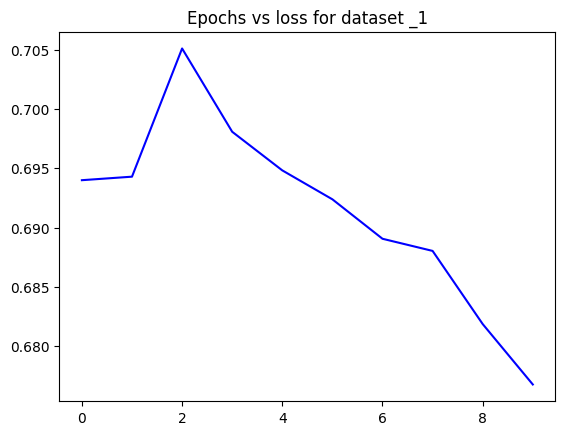

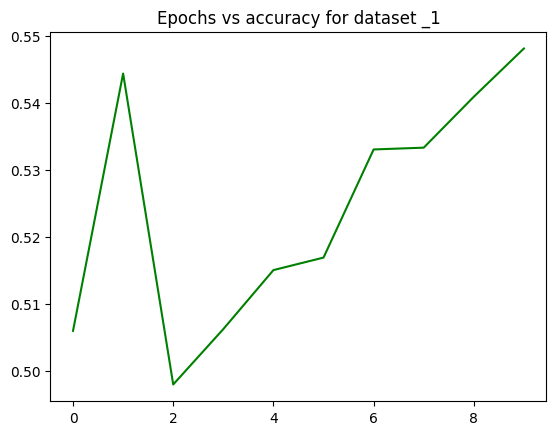

In [52]:
plt.plot([x for x in range(10)],execModel_1.history['loss'],c='blue')
plt.title("Epochs vs loss for dataset _1")
plt.x_label="Epochs"
plt.y_label="Loss"
plt.show()
plt.plot([x for x in range(10)],execModel_1.history['accuracy'],c='g')
plt.title("Epochs vs accuracy for dataset _1")
plt.x_label="Epochs"
plt.y_label="Loss"
plt.show()



```
Plotting Epocs Vs Loss for Model 2
```



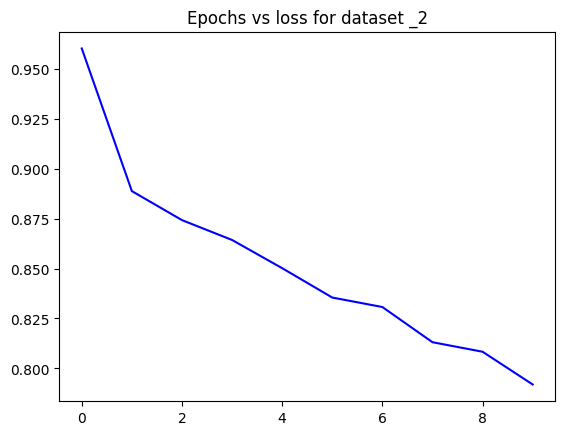

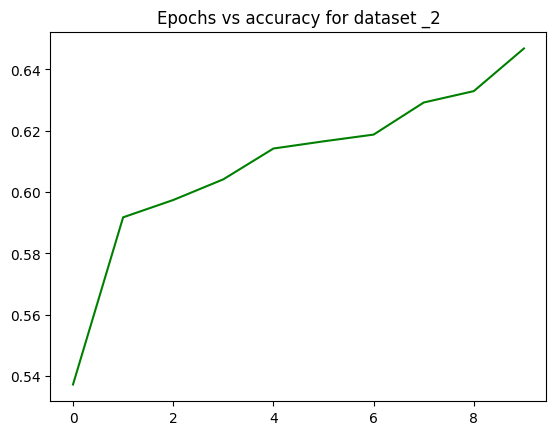

In [53]:
plt.plot([x for x in range(10)],execModel_2.history['loss'],c='blue')
plt.title("Epochs vs loss for dataset _2")
plt.x_label="Epochs"
plt.y_label="Loss"
plt.show()
plt.plot([x for x in range(10)],execModel_2.history['accuracy'],c='green')
plt.title("Epochs vs accuracy for dataset _2")
plt.x_label="Epochs"
plt.y_label="Loss"
plt.show()

# Feed forward Neural Networks Architecture

My proposed feed-forward neural network (FFNN) architecture consists of two hidden layers connected by non-linear activation functions. The first hidden layer, which has 256 neurons, is coupled to the input layer. The second hidden layer, which includes 128 neurons, is connected to the first hidden layer. The output layer, whose size is determined by the number of classes in the problem, is then connected to the second hidden layer.

Here is a visual representation of the architecture:



''' Input Layer (Size depends on input data) --> Hidden Layer 1 (Size: 256) with Non-linearity ---> Hidden Layer 2 (Size: 128) with Non-linearity ---> Output Layer (Size depends on the number of classes) '''


There are several prominent options for non-linearity in this architecture, including the Rectified Linear Unit (ReLU), the hyperbolic tangent (tanh), and the Gaussian Error Linear Unit (GELU).

The binary cross-entropy loss function is frequently used for binary classification issues. The categorical cross-entropy loss function is frequently used for multi-class classification issues.


Feed-Forward There are various uses for neural networks:

    They are able to simulate intricate non-linear input–output interactions.
    They are relatively easy to comprehend and use.
    They can be trained well on sizable datasets using methods like backpropagation and stochastic gradient descent.
    They can be used to solve many different types of issues, like as classification, regression, and prediction.

However, because FFNNs do not account for the temporal correlations between inputs, they are only partially capable of handling sequential or time-series data. Additionally, if the dataset is too little or the model is too complicated, they are more likely to overfit.

Thanking You So Much